In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;} 
div.cell.code_cell.rendered{width:100%;} 
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;} 
div.text_cell_render.rendered_html{font-size:14pt;} 
div.output {font-size:14pt; font-weight:bold;} 
div.input {font-family:Consolas; font-size:14pt;} 
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;} 
div.text_cell_render ul li{font-size:12pt;padding:5px;} 
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10. N차원 배열(Numpy 배열) 다루기</font></b>
- [numpy](http://www.numpy.org)
- [numpy docs](https://numpy.org/doc/stable)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)
# 1절 넘파이 패키지

In [115]:
import numpy as np
np.__version__

'1.23.5'

In [116]:
# np.arange(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
list(range(15))
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열- 정수, 실수, 문자열 모두 같은 타입만
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [117]:
from numpy import arange
a = arange(15,
         # dtype=np.int32  #  int는 기본 4byte- 8,16,32,64,128
          ).reshape(3,5)   # 3행 5열짜리 2차원 배열로 변환 
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [118]:
type(a)  # a변수의 타입 -n타입 array

numpy.ndarray

In [119]:
a.dtype  # a배열의 요소들의 type 

dtype('int32')

In [120]:
a.dtype.name

'int32'

In [121]:
a.itemsize  # a배열안의 한 요소의 bytesize

4

In [122]:
a.ndim  # 축수(차원수)

2

In [123]:
a.size  # 배열 데이터(요소)의 갯수

15

In [124]:
a.shape  # 배열의 구조(3행5열)

(3, 5)

In [125]:
print('shape조정 전 a\n', a)  # 배열로 출력
a.shape = (5,3)
print('shape조정 후 a\n', a)

shape조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [126]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [127]:
a.size  # 요소 갯수

12

In [128]:
a.dtype

dtype('int32')

In [129]:
a.itemsize

4

In [130]:
a.dtype = np.int64    # 읽을 때 int64로(64bit씩) 읽는다.
a.dtype
#  array([[ 4294967296, 12884901890],
#        [21474836484, 30064771078],
#        [38654705672, 47244640266]], dtype=int64)  => 데이터 변질됨

dtype('int64')

In [131]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [132]:
a.itemsize

8

In [133]:
a.size

6

In [134]:
# 배열요소의 타입을 수정
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [135]:
a = a.astype('int64')  # 메소드로 조정하면 a의 값이 변경되는 것이 아니라서 할당해줘야한다.
# a.astype(np.int64)   # 속성의 값을 변경하지 말고 method로 조정해야한다.
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [136]:
a.itemsize  # 

8

In [137]:
a.size

12

In [138]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [139]:
a.ravel()    # flatten된 배열을 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [140]:
a.flatten()  # 함수의 결과가 return되면 배열은 수정안함.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장
- pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷,io속도 개선)

In [141]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [142]:
%%time  
 #주피터노트북의 매직메소드(셀 첫라인에)
import pickle                          # 파일에 쓰기(압축안되고)
with open('data/ch10.pkl','wb') as f:
    pickle.dump(a, f)    

CPU times: total: 0 ns
Wall time: 0 ns


In [143]:
%%time  
with open('data/ch10.pkl','rb') as f:  # 파일을 읽기
    loaded_a = pickle.load(f)

CPU times: total: 0 ns
Wall time: 10.7 ms


In [144]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [145]:
%%time
np.save('data/ch10.npy', a)   # 저장(압축해서)

CPU times: total: 0 ns
Wall time: 6.99 ms


In [146]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 8.59 ms


# 2절 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty....linspace
- 랜덤값을 갖는 함수들 : np.random. ~ 
## 2.1 array() 함수로 넘파이 배열 만들기
  - array(obj, [dtype=np.xx 나 'xx'], copy=T/F)   ->obj가 배열일때 copy필요


In [147]:
a = np.array([2, 4, 6], dtype=np.int16)   # 정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [148]:
a[0],a[1],a[2]

(2, 4, 6)

In [149]:
for i in a:
    print(i, end='\t')

2	4	6	

In [150]:
b = np.array([[1.5, 2.3],    # 배열은 동일 자료형의 집합  : 정수->실수->문자
             [4,  5]])
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [151]:
b[0][1], b[0,1]  # 2차원 [axis0행, axis1열]

(2.3, 2.3)

In [152]:
l = [['1.5', '2.3'],  ['4', 'hello']]
l[0][1]

'2.3'

In [153]:
print(b.dtype)  # 정수 기본타입-int32, 실수 기본타입 - float64
print(b.itemsize)

float64
8


In [41]:
b = b.astype(np.float32)   # 함수의 결과를 return하면 a는 그대로
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [42]:
print(b.dtype)  # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

float32
4


In [43]:
for row in b:
    for item in row:
        print(item, end='\t')
    print()   # 개행

1.5	2.3	
4.0	5.0	


In [44]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행 {}열 : {:.1f}({:.1f})'.format(i, j, item, b[i,j]), end='\t')
    print()   # 개행

0행 0열 : 1.5(1.5)	0행 1열 : 2.3(2.3)	
1행 0열 : 4.0(4.0)	1행 1열 : 5.0(5.0)	


In [45]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [46]:
b[0,1]

2

In [47]:
b[3,1]   # 없는 인덱싱시 에러

IndexError: index 3 is out of bounds for axis 0 with size 3

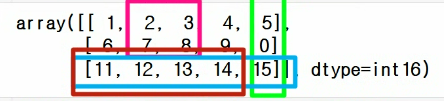

In [48]:
print('0~1행, 1~2열 :\n', b[0:2,1:3])     # 분홍색
print('2행 모두(1차원) :', b[2,:], b[2])   # 특정 행 모든 열을 추출할 경우 열 생략가능 -파랑
print('2행 모두(2차원) :', b[2:3,:], b[2:3])   
print('4열(마지막열)모두(1차원) :', b[:, 4], b[...,4], b[:,-1])    # 특정열, 모든행을 추출 -초록
print('2행 0~3열 :',b[2, 0:-1])       # 갈색
print('마지막열 제외 :\n',b[:, :-1])   # 맨 마지막열을 제외한 모든 값

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행 모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행 모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열(마지막열)모두(1차원) : [ 5  0 15] [ 5  0 15] [ 5  0 15]
2행 0~3열 : [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [49]:
# 스칼라변수
a = 10
copy_a = a  #  복사
print(f'a={a}, 복제본{copy_a}')
copy_a = -1  
print(f'a={a}, 복제본{copy_a}')

a=10, 복제본10
a=10, 복제본-1


In [50]:
# 데이터 구조
a = [0,1]
copy_a = a.copy()  # 깊은 복사
print(f'a={a}, 복제본{copy_a}')
copy_a[0] = -1     # 복제본
print(f'a={a}, 복제본{copy_a}')

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [51]:
# numpy 배열
c = np.array([[1,2],[3,4]])
# d = c    # 주소할당
d = np.array(c, copy=True)  # 깊은 복사  => d = c.copy()동일.  False는 
# d = np.array(c, copy=False)   # 얕은 복사(할당과 다르다)
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c),id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
2247681883664 2247682305328
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup): 요소들이 다 0  (이미지 필터 만들때)
- np.ones(tup) : 요소들이 다 1  (선형대수)
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype속성을 따로 지정 가능

In [156]:
x = np.zeros( (3,2) ) # 3행2열짜리 2차원 float64 배열(요소들은 다 0)
# x = np.zeros( 3,2 ) # 에러
x  = np.zeros((3,))  # 3열짜리 1차원 float64 배열(요소들은 다 0), 검정색 이미지
x = np.zeros( 3 ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [157]:
x  = np.zeros((2,5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [158]:
x  = np.ones((2,5), dtype=np.uint8)   # uint - unsigned int - 양수값만 =>이미지저장
x

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [159]:
np.full((2,3),-1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

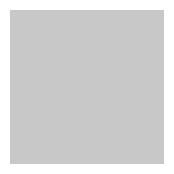

In [160]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))    # 시각화한 그래프 크기 figsize=(가로,세로)
img = np.full((28,28),200, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)  # 이미지는 원래 컬러값이라 cmap='gray', vmin=0, vmax=255로 그레이스케일처리
plt.axis('off') # 축 없애기
plt.show()

In [161]:
import numpy as np
np.empty((3, 2))   #초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- **실수 난수** 
- np.random.random(tup): 0부터 1미만의 균등분포를 갖는 랜덤값 배열
- np.random.uniform(low=0.0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균loc과 표준편차 scale을 갖는 정규분포 랜덤값

- np.random.rand(n) : 균등분포의 1차원 난수 배열발생(난수n개)
- np.random.randn(n) : 표준정규분포(평균0,표준편차1) nomalization

cf) np.random.randint([from,] to): from(0)부터 to미만의 정수난수 1개 발생==random.randint(from, to-1)

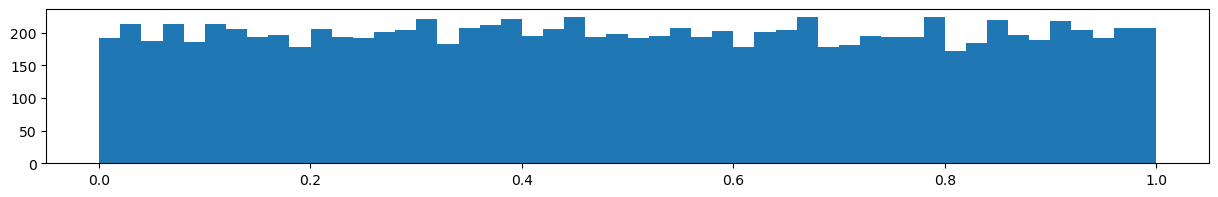

In [164]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
#print(x)
plt.figure(figsize=(15,2))   # 그래프 크기
plt.hist(x,bins=50)
plt.show()

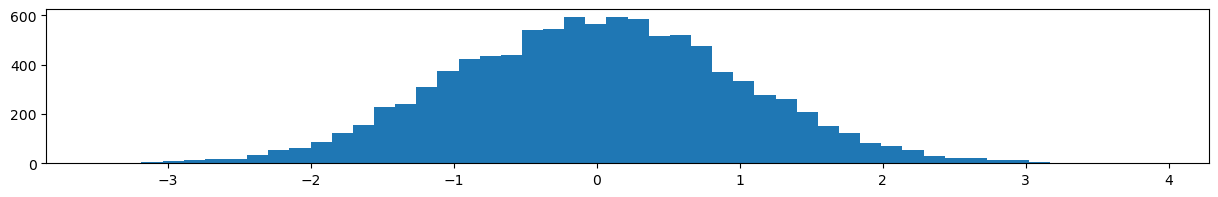

In [166]:
x = np.random.randn(10000)   # 정규분포(표준정규분포는 평균0, 표준편차가 1인 정규분포) 표준편차가 작으면 적은양의 데이터로도 예측하기 쉽다.(신뢰도 높은 데이터)
plt.figure(figsize=(15,2))   # 그래프 크기
plt.hist(x,bins=50)
plt.show()

In [180]:
# 1차원 난수 배열
print(np.random.rand(3))    # 균등분포
print(np.random.randn(3))   # 정규분포

[0.90869586 0.36657695 0.71970674]
[0.1209993  0.74550745 0.86724793]


In [181]:
# 2차원 난수 배열
np.random.random((2,5))    # 2행 5열짜리 균등분포(0~1미만) 난수 배열

array([[0.98442445, 0.35687264, 0.65971819, 0.21317948, 0.03105351],
       [0.39907201, 0.49142154, 0.16368533, 0.39715206, 0.7575076 ]])

In [182]:
np.random.uniform(low=-2, high=2, size=(2,5))  #2행5열짜리 균등분포(-2~2미만) 난수 배열

array([[ 0.8352054 ,  1.68399367, -1.17694582,  1.4113383 ,  0.68249583],
       [-1.77427291, -1.21280883,  0.99262439, -1.2015003 , -0.46814369]])

In [183]:
np.random.normal(size=(2,5))  #2행5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[ 0.39544354,  0.25109145,  0.12515341,  1.47377623,  0.07799244],
       [ 0.77815729, -0.22333605, -1.07191116,  0.15069673,  0.2588162 ]])

In [184]:
np.random.normal(-1, 1, size=(2,5))  #2행5열짜리 정규분포(평균-1, 표준편차1) 난수 배열

array([[-1.88053003, -1.39071927, -2.65193079, -1.43250517, -0.24011221],
       [-0.06156707, -0.53445823,  0.08295088, -0.80368741, -1.30778818]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspac(from, to, num) : from부터 to(포함)까지 균등한 num개 숫자들을 1차원 배열로 생성 

In [185]:
np.arange(10, 30, 5, dtype=np.float64)   # float32 비추 (소숫점이하값 변질가능성)

array([10., 15., 20., 25.])

In [186]:
np.arange(0, 2.1, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])

In [187]:
np.linspace(0,5,5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [188]:
# linspace : 특정한 범위의 수들을 많이 생성할때 쓴다.
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

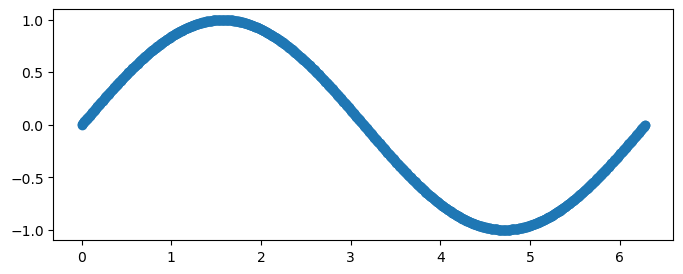

In [189]:
plt.figure(figsize=(8,3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 함수의 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [190]:
t = np.random.random((2,3))
t

array([[0.7846212 , 0.76838062, 0.60959507],
       [0.79955339, 0.01912888, 0.97632932]])

In [192]:
a = np.round(t*10)  # 반올림
a

array([[ 8.,  8.,  6.],
       [ 8.,  0., 10.]])

In [193]:
a = a.astype(np.int16)
a

array([[ 8,  8,  6],
       [ 8,  0, 10]], dtype=int16)

In [195]:
a = a.reshape(3,2)
a

array([[ 8,  8],
       [ 6,  8],
       [ 0, 10]], dtype=int16)

In [196]:
a.reshape(-1,1)   # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[ 8],
       [ 8],
       [ 6],
       [ 8],
       [ 0],
       [10]], dtype=int16)

In [197]:
a.reshape(3,-1)

array([[ 8,  8],
       [ 6,  8],
       [ 0, 10]], dtype=int16)

In [198]:
a.resize(3,2)   # 실행결과가 출력 안 되면 a가 바뀜
a

array([[ 8,  8],
       [ 6,  8],
       [ 0, 10]], dtype=int16)

In [199]:
a.resize(2, -1)  # resize는 -1 사용 불가
a

ValueError: negative dimensions not allowed

In [200]:
a

array([[ 8,  8],
       [ 6,  8],
       [ 0, 10]], dtype=int16)

In [201]:
# 전치행렬 (x행y열 ->y행x열) - 행과 열을 맞바꾼것
a.T  # a의 전치행렬

array([[ 8,  6,  0],
       [ 8,  8, 10]], dtype=int16)

In [202]:
a.transpose() # a의 전치행렬

array([[ 8,  6,  0],
       [ 8,  8, 10]], dtype=int16)

## 2.6 배열 출력

In [203]:
np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [204]:
# 배열요소가 몇개까지 다 출력되나?  1000개 요소 이상은 생략되서 출력됨
np.get_printoptions()['threshold']

1000

In [205]:
# 배열이 커서 인쇄가 안되는 경우 : 모서리 부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [206]:
# 인쇄 옵션 변경
import sys
np.set_printoptions(threshold=sys.maxsize)  # 정수 최대치까지 출력가능
np.set_printoptions(threshold=np.inf)    # 무한대까지 출력가능

In [208]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작
### 1) 배열의 요소별 연산

In [210]:
import numpy as np
# 리스트
a = [10,20,30,40]
b = list(range(4))
a + b, a*3

([10, 20, 30, 40, 0, 1, 2, 3],
 [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40])

In [211]:
# numpy array(배열)
a = np.array([10,20,30,40])
b = np.arange(4)
a, b

(array([10, 20, 30, 40]), array([0, 1, 2, 3]))

In [212]:
a + b   # 배열은 요소별 연산을 한다.

array([10, 21, 32, 43])

In [213]:
a * 3   # 요소별 *3 연산

array([ 30,  60,  90, 120])

In [214]:
a * b    # 요소별 * 연산   (행렬연산은 @)

array([  0,  20,  60, 120])

In [215]:
a ** b    # 요소별 제곱연산

array([    1,    20,   900, 64000])

In [216]:
a < 40    # 각 요소별 연산

array([ True,  True,  True, False])

In [217]:
print(a[[0,3]])  # 0,3 번째 인덱스 item
print(a[[True, False, False, True]])   # 0은 True, 1은 False, 2는 False, 3은 True

[10 40]
[10 40]


In [218]:
# a배열에서 40보다 작은 데이터만 추출(boolean index)
a[a<40]

array([10, 20, 30])

In [219]:
# a배열에서 40보다 작은 데이터의 index
np.where(a<40)

(array([0, 1, 2], dtype=int64),)

### 2) 행렬의 곱(@, dot함수)
cf. *(요소별 곱)

In [220]:
A = np.array([[1,1],
              [0,1]])
B = np.array([[2,0],
              [3,4]])
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [221]:
print('요소별 곱 A*B = ', A*B, sep='\n')
print('행렬 곱 A@B = ', A@B, sep='\n')
print('행렬 곱 A.dot(B) = ', A.dot(B), sep='\n')

요소별 곱 A*B = 
[[2 0]
 [0 4]]
행렬 곱 A@B = 
[[5 4]
 [3 4]]
행렬 곱 A.dot(B) = 
[[5 4]
 [3 4]]


In [222]:
# 일반적으로는 행렬곱은 교환법칙이 성립 안함
print('A@B = ', A@B, sep='\n')
print('B@A = ', B@A, sep='\n')

A@B = 
[[5 4]
 [3 4]]
B@A = 
[[2 2]
 [3 7]]


In [17]:
# pdf 19페이지 확인(1)
A = np.array([[1,2],
              [3,4]])
B = np.array([[-1,-1],
              [1,1]])
A@B, B@A

(array([[1, 1],
        [1, 1]]),
 array([[-4, -6],
        [ 4,  6]]))

In [18]:
# pdf 19페이지 확인 (2)
A = np.array([ [1,2],
               [3,4]])
B = np.array([ [6],
               [7]])
A@B # B@A는 에러

array([[20],
       [46]])

In [19]:
# pdf 19페이지 확인 (3)
A = np.array([ [1,2,3],
               [3,4,1]])
B = np.array([ [0,0],
               [1,1],
               [-1,2]])
A@B, B@A

(array([[-1,  8],
        [ 3,  6]]),
 array([[ 0,  0,  0],
        [ 4,  6,  4],
        [ 5,  6, -1]]))

In [20]:
# 단위행렬에서는 교환법칙 성립
# pdf 19페이지 확인 (4)
A = np.array([ [2, 0],
               [3,4]])
B = np.array([ [1,0],
               [0,1]])
A@B, B@A # B : 2행2열짜리 단위행렬

(array([[2, 0],
        [3, 4]]),
 array([[2, 0],
        [3, 4]]))

In [21]:
np.eye(2)   # 2행2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [22]:
np.eye(3)   # 3행3열짜리 단위행렬(정방행렬)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입 연산자 사용(+=, -=, *=, ...)
- 배열에서의 a+=b는 a=a+b와 다소 다르게 작동한다.(스칼라변수에서는 동일한데...)

In [223]:
a = np.ones((2,3), dtype='int8')   # 2행3열짜리 int8배열   dtype=np.int8과 같다.
b = np.random.random((2,3))        # 2행3열짜리 random값(0부터 1미만의 균등분포를 갖는) float64 배열 
print(a, b, sep='\n')

[[1 1 1]
 [1 1 1]]
[[0.15347423 0.00079022 0.26936386]
 [0.67982797 0.39831975 0.41256313]]


In [225]:
a += 256    # a+256결과를 a에 넣는데, 공간이 부족하면 앞이 짤림  
a

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [226]:
a = a + 256   # a+256결과를 새로운 a에 할당
a

array([[257, 257, 257],
       [257, 257, 257]], dtype=int16)

In [227]:
# a는 int16, b는 float64
b.dtype

dtype('float64')

In [228]:
b += a  # b+a의 결과를 b에 넣는다.
b

array([[257.15347423, 257.00079022, 257.26936386],
       [257.67982797, 257.39831975, 257.41256313]])

In [229]:
a += b  # a+b의 결과를 a에 넣는다.  => 복합대입연산자(배열의 연산에서는 복합대입연산자를 쓰지 않는다.)

a

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'

### 4)배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)
- 분산과 표준편차의 차이

In [230]:
a = np.array([[2, 2, 2, 3],
              [4, 3, 2, 1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [231]:
print('전체 합 :', a.sum(), np.sum(a))
print('전체 평균 :', a.mean(), np.mean(a))
print('전체 최소값 :', a.min(), np.min(a))
print('전체 최대값 :', a.max(), np.max(a))
print('전체 분산 :', a.var(), np.var(a))
print('전체 표준편차 :', a.std(), np.std(a))

전체 합 : 19 19
전체 평균 : 2.375 2.375
전체 최소값 : 1 1
전체 최대값 : 4 4
전체 분산 : 0.734375 0.734375
전체 표준편차 : 0.8569568250501305 0.8569568250501305


In [31]:
# 분산에 루트를 씌우면 표준편차
import math
math.sqrt(a.var())   # math.sqrt(스칼라데이터)

0.8569568250501305

### 5) 배열 축별 집계
- 축별(열별, 행볍) sum, min, max, mean, var(분산), std(표준편차), argmax(최대값index)

In [32]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [232]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [233]:
# 행별 합계 : axis=0(행), axis=1(열) : 행을 고정하고 열(axis1축)들의 합
print('a 행별 합 :', a.sum(axis=1), np.sum(a, axis=1))
print('a 행별 평균 :', a.mean(axis=1), np.mean(a, axis=1))

a 행별 합 : [ 9 10] [ 9 10]
a 행별 평균 : [2.25 2.5 ] [2.25 2.5 ]


In [234]:
# 열별 합계 : axis=0(행), axis=1(열) : 열을 고정하고 행(axis0축)들의 합
print('a 열별 합 :', a.sum(axis=0), np.sum(a, axis=0))
print('a 열별 평균 :', a.mean(axis=0), np.mean(a, axis=0))

a 열별 합 : [6 5 4 4] [6 5 4 4]
a 열별 평균 : [3.  2.5 2.  2. ] [3.  2.5 2.  2. ]


## 2.8 그 외 요소별 계산하는 범용함수들
- 메모리를 효율적으로 사용할 수 있음
    * np.add(A, B, C) : C=np.add(A,B) : C=A+B
    * np.multiply(A, B, C): C=np.multiply(A,B) : C=A*B
    * np.subtract(A,B,C)...
    * np.sqrt(배열) : 제곱근 cf math.sqrt(스칼라변수)

In [3]:
import numpy as np
a = np.array([1,2])
b = np.array([3,4])
c = np.empty( (2,) )
a, b, c

(array([1, 2]), array([3, 4]), array([-3.83804836e-141,  7.22736698e-240]))

In [241]:
%%time    
np.add(a, b, c)
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4., 6.])

In [242]:
%%time
c = a + b
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4, 6])

In [4]:
# 메모리 사용량과 속도 측정을 해주는 메모리 프로파일러를 로드해서 설치
# 아나콘다 프롬프트에서 pip install 라이브러리이름(memory_profiler)-최신버전
%load_ext memory_profiler
A = np.random.randn(100000000)   # 1억개 요소
B = np.random.randn(100000000)   
C = np.random.randn(100000000)   

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [5]:
A,B,C

(array([1.43650288, 0.20590471, 1.85658304, ..., 1.30942459, 0.79803989,
        1.36305213]),
 array([ 0.1011493 , -0.78510486, -0.60223862, ...,  0.35023624,
         0.68605828,  0.83293084]),
 array([-1.55293141,  0.38887204,  1.26997114, ..., -0.0700093 ,
         0.29657104, -1.17943746]))

In [6]:
# %%time : 셀 실행시 소요시간 출력(셀 맨위에)
# %memit : 메모리 사용량 출력    

In [7]:
%%time
%memit G = A*B + C
print(G)

peak memory: 3704.60 MiB, increment: 1318.72 MiB
[-1.40763015  0.22721525  0.15186513 ...  0.38859864  0.84407291
 -0.04410931]
CPU times: total: 500 ms
Wall time: 1.25 s


In [8]:
%%time
%memit np.multiply(A, B, G); np.add(G, C, G)
print(G)

peak memory: 3149.10 MiB, increment: 0.00 MiB
[-1.40763015  0.22721525  0.15186513 ...  0.38859864  0.84407291
 -0.04410931]
CPU times: total: 266 ms
Wall time: 997 ms


## 2.9 브로드 캐스팅
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [9]:
a = np.array([1,2,3])
b = 10
print(a+b)    # 요소별 연산
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [11]:
# 1차원 배열의 브로드캐스팅
a = np.array([1,2,3])
b = np.array([10])
print(a+b)    # 요소별 연산
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [12]:
b

array([10])

In [13]:
a * b

array([10, 20, 30])

In [14]:
# 2차원 배열의 브로드캐스팅
import numpy as np
a = np.array([[0,0,0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])   # 4행3열짜리 2차원 배열
b = np.array([0,1,2])        # 3열짜리 1차원 배열
np.add(a,b), np.multiply(a,b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [15]:
# 2차원 배열의 브로드캐스팅
a = np.array([[0,0,0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])   # 4행 3열짜리 2차원 배열
b = np.array([[0],
              [1],
              [2],
              [3]])        # 4행 1열짜리 2차원 배열
np.add(a,b), np.multiply(a,b)

(array([[ 0,  0,  0],
        [11, 11, 11],
        [22, 22, 22],
        [33, 33, 33]]),
 array([[ 0,  0,  0],
        [10, 10, 10],
        [40, 40, 40],
        [90, 90, 90]]))

In [18]:
import numpy as np
# from numpy import newaxis
# a, b를 모든 쌍 조합에 대해 계산을 하고 싶을 때  (브로드캐스팅이용)
a = np.array([0,10,20,30])  # 4열짜리 1차원 배열
b = np.array([1, 2, 3]) 
# 1차원배열 a를 2차원배열로
A = a.reshape(-1, 1)
A = a[:, np.newaxis]   # newaxis를 이용하여 배열의 새로운 축을 추가하여 2차원
A = np.expand_dims(a, axis=1)
A

array([[ 0],
       [10],
       [20],
       [30]])

In [62]:
A + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [19]:
# a, b를 모든 쌍 조합에 대해 계산을 하고 싶을 때 
a = np.array([0,10,20,30])  # 4열짜리 1차원 배열
b = np.array([1, 2, 3]) 
A, B = np.ix_(a, b)
A, B

(array([[ 0],
        [10],
        [20],
        [30]]),
 array([[1, 2, 3]]))

In [20]:
A+B

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

# 3절 배열 합치기/배열 분리하기
- 슬라이싱
- 두 배열을 합치는 함수
- r_, c_
- 하나의 베열을 여러개 작은 배열로 분리하는 함수
## 3.1 슬라이싱

In [21]:
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [22]:
c[0,2,1]   # 배열,  리스트 - c[0][2][1]
# c[2,0,0] - 없는 index는 에러

9

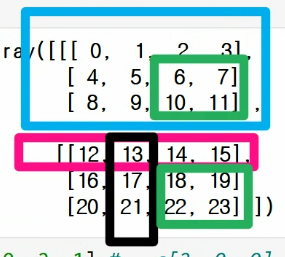

In [25]:
print(c[0], c[0,:,:], c[0, ...])# 0면의 모든 데이터(파랑)(후행축은 생략 가능)
print(c[1, 0], c[1, 0, :], c[1, 0, ...])# 1면 0행의 모든 데이터(빨강)
print(c[1, :, 1], c[1, ..., 1])# 1면 1열의 모든 데이터(검정)(선행축이나 중간축은 생략이 불가)
print(c[:,1:3,2:],c[...,1:3,2:])# 모든 면의 1~2행, 2~3열까지(녹색)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 13 14 15] [12 13 14 15] [12 13 14 15]
[13 17 21] [13 17 21]
[[[ 6  7]
  [10 11]]

 [[18 19]
  [22 23]]] [[[ 6  7]
  [10 11]]

 [[18 19]
  [22 23]]]


In [26]:
c[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
c[1,0,:]

array([12, 13, 14, 15])

In [28]:
c[1,:,1]

array([13, 17, 21])

In [29]:
c[:,1:,2:]

array([[[ 6,  7],
        [10, 11]],

       [[18, 19],
        [22, 23]]])

## 3.2 두 배열을 쌓아 합치는 함수
- vstack( tup ) : 아래로 추가하는 방식 
- hstack( tup ) : 옆으로 추가하는 방식
- dstack( tup ) : 마지막 축(열)을 쌓아 합침(차원 증가)

In [32]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack( (a, b))
print('vstack 아래로 추가하여 합치기:', v, v.shape, sep='\n')
h = np.hstack( (a, b))
print('hstack 옆으로 추가하여 합치기:', h, h.shape, sep='\n')
d = np.dstack( (a, b))
print('dstack 축을 depth로 합치기:', d, d.shape, sep='\n')

vstack 아래로 추가하여 합치기:
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 추가하여 합치기:
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기:
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [35]:
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [36]:
a, b = c   #c[0], c[1]   # c[0]이 a, c[1]이 b
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [37]:
# 수직으로 합치기
np.vstack( (a, b) )

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [85]:
np.concatenate( (a, b), axis=0)   # axis=0이 기본값(행으로 합쳐)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [39]:
# 옆으로 합치기
np.hstack( (a, b) )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [40]:
np.concatenate( (a, b), axis=1)

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- column_stack(tup) : 1차원 배열을 2차원 배열의 열단위로 합침. dstack과 비교
- row_stack(tup) : 행단위로 합침 == vstack()

In [41]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.column_stack( (a,b,c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [42]:
np.dstack( (a,b,c) ).reshape(4,3)

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [43]:
np.hstack( (a[:, np.newaxis], b[:, np.newaxis], c[:, np.newaxis]))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [44]:
# 행쌓기
np.row_stack( (a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [45]:
# 수직쌓기
np.vstack( (a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

- stack(tup, axis=n) : axis=0:첫번째차원(2차원일때는 행, 3차원일때는 면), axis=-1(열)

In [46]:
a = np.arange(12).reshape(3,4)
b = np.arange(12,24).reshape(3,4)
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [47]:
# 0면에 a,  1면에 b로 stack
np.stack((a, b), axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [48]:
# 행(1축)끼리 합쳐서 면을 이룸
np.stack((a, b), axis=1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [49]:
# a의 행과 b의 행이 열로  합쳐서 면을 이룸
np.stack((a, b), axis=-1)

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_
   - 나열 객체

In [97]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.r_[a, b, c]  # 한 행

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [98]:
np.r_[[a],[b],[c]]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [99]:
np.c_[a, b, c]    #컬럼단위로 쌓아줌

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [100]:
np.column_stack( (a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4 배열을 분리하는 함수
- vsplit(ary, 정수나 벡터) : 첫번째 축을 따라 분할(2차원의 경우 가로축 분할)
- hsplit(ary, 정수나 벡터) : 두번째 축을 따라 분할(2차원의 경우 세로축 분할)
- dsplit(ary, 정수나 벡터) : depth를 따라 분할(3차원이상에서만 동작)
    * 정수 n : n개로 분리
    * [n] : n번째 인덱스를 기점으로 분리
    * [m, n] : m번째, n번째 인덱스를 기점으로 분리

In [50]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
# 가로축을 따라 3개로 분할(분할 후 차원 유지)
a_v = np.vsplit(a,3)
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [52]:
# 가로축을 따라 1번 index 기준으로 분할(분할 후 차원 유지)
a_v = np.vsplit(a,[1])
a_v

[array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])]

In [53]:
# 가로축을 따라 1,2번 index 기준으로 분할(분할 후 차원 유지)
a_v = np.vsplit(a,[1,2])
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [54]:
np.hsplit(a,2)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [55]:
np.hsplit(a,[1,3])

[array([[0],
        [4],
        [8]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3],
        [ 7],
        [11]])]

- split(ary, 갯수나 인덱스벡터, axis=?)
- array_split(ary, 갯수나 인덱스벡터, axis=?)
    * axis=0 : vsplit() 동일
    * axis=1 : hsplit() 동일
    * axis=2 : dsplit() 동일
    - array_split : 나눠지지 않는 정수로도 사용 가능

In [56]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [57]:
np.split(a, 2, axis = 0)   # axis=0 : 0번축 기준으로 분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [58]:
np.split(a, 2, axis = 1)   # axis=1 : 1번축 기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [59]:
np.array_split(a, 2, axis = 1)   # axis=1 : 1번축기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [60]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [ ]:
# np.split(a, 3, axis = 1)   # error

In [61]:
np.array_split(a, 3, axis = 1) # 나눠서 떨어지지 않는 수로도 분리가능

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]